In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import csv
import os
import shutil, sys
import random


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [3]:
train_path = './images/train'
valid_path = './images/valid'
test_path = './images/test'

classes = [name for name in os.listdir("./images/train")]

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=classes, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=classes, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=classes, batch_size=10, shuffle=False)

Found 22372 images belonging to 353 classes.
Found 3474 images belonging to 353 classes.
Found 3482 images belonging to 353 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

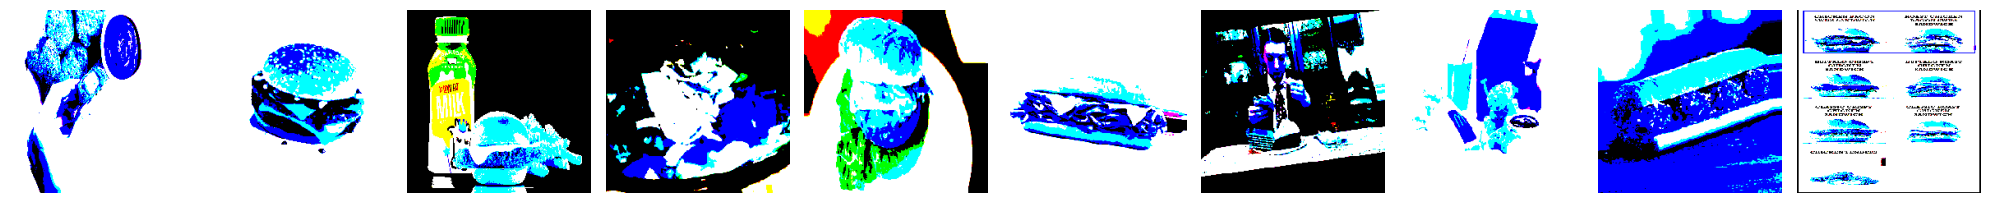

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
plotImages(imgs)
print(labels)

In [7]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False

model.add(Dense(units=len(classes), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=1
)

Epoch 1/10
  12/2238 [..............................] - ETA: 2:24 - loss: 7.1517 - accuracy: 0.0000e+00

C:\Users\mtvuu\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2238/2238 [==============================] - 199s 88ms/step - loss: 4.8052 - accuracy: 0.1108 - val_loss: 3.9296 - val_accuracy: 0.1744
Epoch 2/10
2238/2238 [==============================] - 172s 77ms/step - loss: 2.5938 - accuracy: 0.3608 - val_loss: 3.5486 - val_accuracy: 0.2277
Epoch 3/10
2238/2238 [==============================] - 167s 75ms/step - loss: 1.8773 - accuracy: 0.5002 - val_loss: 3.3482 - val_accuracy: 0.2542
Epoch 4/10
2238/2238 [==============================] - 172s 77ms/step - loss: 1.4638 - accuracy: 0.5889 - val_loss: 3.2504 - val_accuracy: 0.2899
Epoch 5/10
2238/2238 [==============================] - 172s 77ms/step - loss: 1.1954 - accuracy: 0.6563 - val_loss: 3.2364 - val_accuracy: 0.2925
Epoch 6/10
2238/2238 [==============================] - 173s 77ms/step - loss: 1.0292 - accuracy: 0.6913 - val_loss: 3.2903 - val_accuracy: 0.3115
Epoch 7/10
2238/2238 [==============================] - 173s 77ms/step - loss: 0.9118 - accuracy: 0.7188 - val_loss: 3.2830 - val

In [11]:
model.save('./fastfoodmodel_v2.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

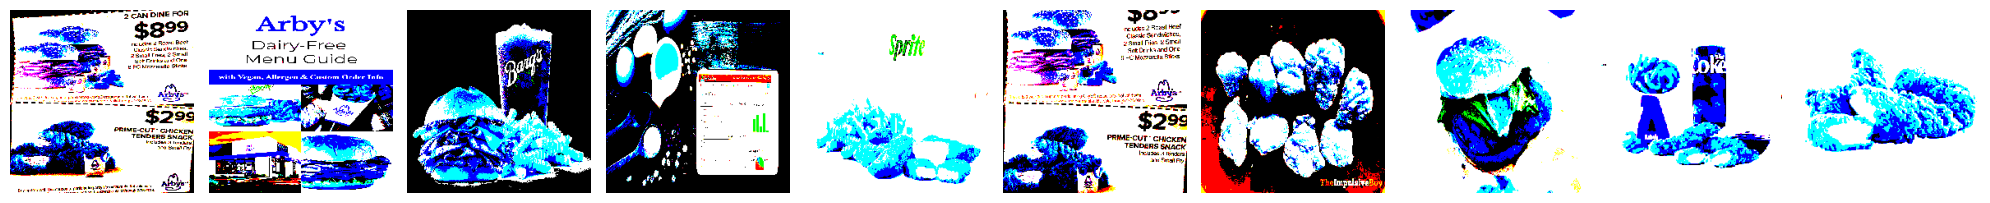

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [13]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [14]:
print(predictions[:5])

[[3.1422526e-02 5.9114839e-04 1.4024766e-03 ... 9.8537374e-04
  1.0090665e-03 7.6336315e-04]
 [9.8150558e-05 5.0073949e-04 9.3838088e-02 ... 3.9939568e-04
  1.3085287e-04 6.0063181e-04]
 [3.2810880e-05 4.9784669e-04 2.9877758e-01 ... 3.9306933e-06
  1.5205708e-06 7.0918014e-07]
 [4.0722787e-07 9.8009539e-01 3.1672622e-07 ... 1.2952879e-09
  1.3859407e-07 1.4074230e-08]
 [1.6331626e-02 7.9497315e-02 3.2669918e-03 ... 4.1947665e-06
  3.8819521e-06 9.4041496e-07]]


In [12]:
model = keras.models.load_model('fastfoodmodel_v2.h5')

In [13]:
def load_and_process_image(img_name):
        full_path = img_name
        image = tf.io.read_file(full_path)
        image = tf.io.decode_jpeg(contents=image, channels=3)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, size=(224, 224))
        return tf.keras.applications.vgg16.preprocess_input(image)

def plotImage(images_arr):
    fig, axes = plt.subplots(1, 1, figsize=(10,10))
#     axes = axes.flatten()
#     for img, ax in zip( images_arr, axes):
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()

In [26]:
image = load_and_process_image('test.jpg')
image = np.reshape(image, (1, 224, 224, 3))
predictions = model.predict(image)
# plotImage(image[0])
print(sorted(zip(predictions[0], classes))[-20:])

1/1 [==============================] - 0s 18ms/step
[(0.0016056219, 'Burger King Homestyle Cheeseburger'), (0.0020157727, 'Burger King BBQ Bacon King'), (0.0022418916, 'Arbys Double Roast Beef'), (0.002476744, 'Mcdonalds Filet-O-Fish'), (0.0029930326, 'Burger King Double Cheeseburger'), (0.0037992042, 'Burger King Sourdough King Single'), (0.00392555, 'Burger King Bacon Cheddar Ranch Crispy Chicken Sandwich'), (0.004696933, 'Burger King Cheeseburger'), (0.00571912, 'Burger King Big Fish Sandwich'), (0.006473335, 'Arbys Half Pound Roast Beef Sandwich'), (0.008052678, 'Mcdonalds McDouble'), (0.009148144, 'Mcdonalds Single Bacon Smokehouse Burger'), (0.009336193, 'Burger King Chicken Parmesan Sandwich'), (0.018659722, 'Burger King Bacon Cheeseburger Deluxe'), (0.024058284, "Arbys Roast Beef 'n Cheese Slider"), (0.033092353, 'Mcdonalds McChicken'), (0.1266181, 'Burger King Steakhouse King'), (0.14132681, 'Mcdonalds Cheeseburger'), (0.24177995, 'Burger King Spicy Crispy Jalapeno Chicken San

In [27]:
print(classes)
for i in range(len(classes)):
    classes[i] = classes[i].replace('Arbys ', '').replace('')

['Arbys 2 piece Prime-Cut Chicken Tenders', 'Arbys 3 piece Prime-Cut Chicken Tenders', 'Arbys 5 piece Prime-Cut Chicken Tenders', "Arbys Arby's Melt", 'Arbys Arby-Q Sandwich', "Arbys Beef 'n Cheddar Classic", "Arbys Beef 'n Cheddar Mid", 'Arbys Bourbon BBQ Brisket Sandwich', 'Arbys Bourbon BBQ Chicken Sandwich', 'Arbys Bourbon BBQ Steak Sandwich', 'Arbys Buffalo Chicken Slider', 'Arbys Buttermilk Buffalo Chicken Sandwich', 'Arbys Buttermilk Chicken Bacon & Swiss', 'Arbys Buttermilk Chicken Cordon Bleu Sandwich', 'Arbys Buttermilk Crispy Chicken Sandwich', "Arbys Chicken Tender 'n Cheese Slider", 'Arbys Chopped Side Salad', 'Arbys Classic Roast Beef', "Arbys Corned Beef 'n Cheese Slider", 'Arbys Crispy Chicken Farmhouse Salad', 'Arbys Double Roast Beef', 'Arbys Fire-Roasted Philly Steak', 'Arbys Grand Turkey Club', 'Arbys Greek Gyro', 'Arbys Greek Gyro Salad', "Arbys Half Pound Beef 'n Cheddar Sandwich", 'Arbys Half Pound French Dip & Swiss', 'Arbys Half Pound Roast Beef Sandwich', 'Arb